<a href="https://colab.research.google.com/github/Dharvi-k/mental-health-in-tech-analysis/blob/main/Mental_Health_In_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mental Health in the Tech Industry – Analysis & Insights**

*This project analyzes the 2014–2020 OSMI Mental Health in Tech Survey to uncover relationships between work environment factors and whether individuals seek treatment for mental health.*


*Understanding the Problem*

 *The dataset is a survey conducted among tech employees about their mental health at work. We will try to solve the problem:*

*Can we predict whether an employee will seek mental health treatment based on their survey responses?*

*This is a binary classification problem (Yes/No).*



---



**Import required libraries**

In [ ]:
import torch
import pandas as pd
import numpy as np


**Setting up device agnostic code**

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device= {device}")

Using device= cpu


**Upload the csv file in google colab**

In [ ]:
# Since the file is on our local computer we'll upload it to google colab using files.upload()

from google.colab import files
uploaded=files.upload()

Saving survey.csv to survey.csv


**Load the csv file using pandas**

In [ ]:
import pandas as pd

# Load the dataset
df=pd.read_csv('survey.csv')

# Show the first 5 rows
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


**Basic Information About the Dataset**

We use `.shape`, `.info()` and `.describe()` to understand:
- The size of the data (rows, columns)
- The data types of each column
- Basic statistics like mean, count, etc.

In [ ]:
# Check shape: (rows, columns)
print(f"Shape of dataset: {df.shape}")

# Check data types and non-null counts
print("Dataset info:")
df.info()

# Check basic statistics
print(f"\nDescriptive statistics:\n{df.describe()}")


Shape of dataset: (1259, 27)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options        

##  **Data Cleaning**


**All unique values in Gender column:**

In [ ]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

**Standardizing Gender Values**

In [ ]:
import numpy as np

# Lowercase everything for consistency
df['Gender']=df["Gender"].str.lower()

# Define mapping dictionary
gender_map={
    "male": "Male", "m": "Male", "man": "Male", "cis male": "Male", "male-ish": "Male", "msle": "Male",
    "malr": "Male", "mail": "Male", "make": "Male", "cis man": "Male", "male (cis)": "Male",

    "female": "Female", "f": "Female", "woman": "Female", "cis female": "Female", "femake": "Female",
    "female (cis)": "Female", "cis-female/femme": "Female",

    "trans-female": "Non-binary", "trans female": "Non-binary", "trans woman": "Non-binary",
    "trans male": "Non-binary", "non-binary": "Non-binary", "genderqueer": "Non-binary",
    "gender fluid": "Non-binary", "genderqueer/non-binary": "Non-binary", "agender": "Non-binary",

    "other": "Other", "all": "Other", "p": "Other", "nah": "Other", "enby": "Other",
    "neuter": "Other", "something kinda male?": "Other", "a little about you": "Other"
}

# Apply mapping
df['Gender']=df['Gender'].map(gender_map)

# Replace anything still unmapped with "Other"
df['Gender']=df['Gender'].fillna("Other")

# Check the cleaned values
df["Gender"].value_counts()

,count
Gender,
Male,986
Female,244
Other,24
Non-binary,5


# **Exploratory Data Analysis (EDA)**

EDA (Exploratory Data Analysis) is the process of exploring the dataset to understand its structure, patterns, outliers, missing values, and relationships between variables.

In [ ]:
# 1. Display first 5 rows
print(df.head())
print("__________________________________________________________________________________________")
# 2. Check the structure of columns again
print(df.columns)
print("__________________________________________________________________________________________")
# 3. Check summary statistics for numeric columns (especially Age)
print(df.describe())
print("__________________________________________________________________________________________")
# 4. Check how many missing values are in each column
print(df.isnull().sum())

print("__________________________________________________________________________________________")

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44    Male   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

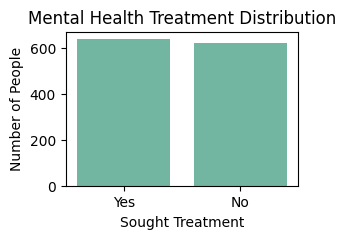

In [ ]:
# Plot value counts for the 'treatment' column

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Set2")
plt.figure(figsize=(3,2))
sns.countplot(data=df,x="treatment")
plt.title('Mental Health Treatment Distribution')
plt.xlabel('Sought Treatment')
plt.ylabel('Number of People')
plt.show()



---


The dataset is fairly balanced: nearly equal number of people did and did not seek mental health treatment.


---



In [ ]:
# Total no of yes and no
df['treatment'].value_counts()

,count
treatment,
Yes,637
No,622




---


While the bar chart gave us a visual comparison, we confirmed the exact numbers using `.value_counts()` from Pandas.


---



# **Analyze Gender Distribution and Bias**

**Gender can have an impact on mental health openness, and knowing gender imbalance will help us preprocess the data later.**

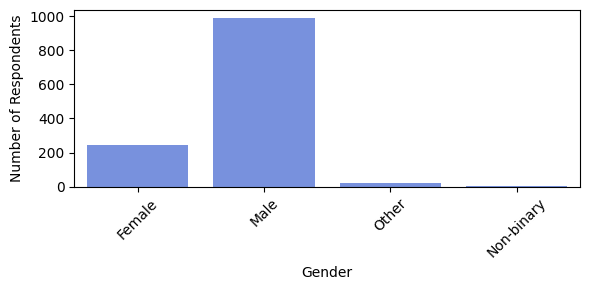

In [ ]:
# Analyze Gender Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("coolwarm")
plt.figure(figsize=(6,3))
sns.countplot(data=df, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Generating the value counts of Gender column
df['Gender'].value_counts()

,count
Gender,
Male,986
Female,244
Other,24
Non-binary,5




---


Tech Industry Gender Distribution Is Skewed Toward Male Respondents
Male (986 / 1250 ≈ 78.9%) dominates the survey.

Female (244 / 1250 ≈ 19.5%) is significantly underrepresented.

Other/Non-binary (20 / 1250 ≈ 1.6%) is a small minority.

Insight: This reflects a commonly known trend — the tech industry is heavily male-dominated, which may also influence how mental health is addressed or perceived in the workplace.


---



In [ ]:
# Check the relationship between gender and treatment

pd.crosstab(df['Gender'], df["treatment"])

treatment,No,Yes
Gender,,
Female,75,169
Male,538,448
Non-binary,2,3
Other,7,17


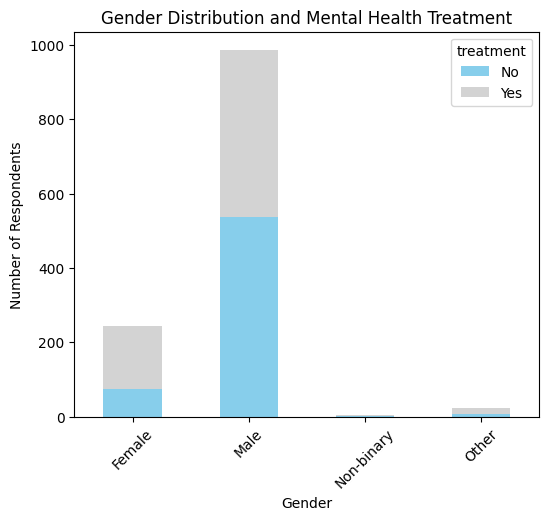

In [ ]:
# Let's  visulaize this data

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a crosstab of Gender vs Treatment
ct=pd.crosstab(df['Gender'], df["treatment"])

# Step 2: Plot as stacked bar
ct.plot(
    kind='bar',
    stacked=True,
    figsize=(6,5),
    color=["skyblue", "lightgrey"]
)

# Step 3: Add labels
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.title('Gender Distribution and Mental Health Treatment')
plt.xticks(rotation=45)
plt.show()



---

- The visualization of gender-wise mental health treatment distribution reveals notable disparities. A significantly higher proportion of females (≈69%) and individuals identifying as Non-binary or Other (60–71%) reported receiving mental health treatment, compared to only 45% of males.

- These findings suggest that gender plays a key role in mental health behavior. Social stigma and cultural norms may inhibit men from seeking help, while women and gender-diverse individuals may exhibit greater openness toward treatment. This highlights the need for gender-sensitive mental health interventions.



---



## Mental Health Treatment Analysis by Employment Type (Self-Employed vs. Others)


Whether the person is self-employed (freelancer/consultant) or working for a company.

- Self-employed people often don’t get workplace mental health support.

- They may feel more isolated or under pressure.



In [ ]:
# Raw values in self_employed column
df['self_employed'].value_counts(dropna=False)


,count
self_employed,
No,1095
Yes,146
NaN,18




---

- Most tech workers in this survey are not self-employed.

- 1095 said "No", while only 146 are self-employed.

- Only ~11% are self-employed (146 / (1095 + 146) ≈ 11.8%)

- This could affect mental health support — self-employed people may have less access to company-sponsored resources.


---



In [ ]:
# Fill missing values (NaN) as "No" — assuming most are company employees
df['self_employed']=df['self_employed'].fillna('No')

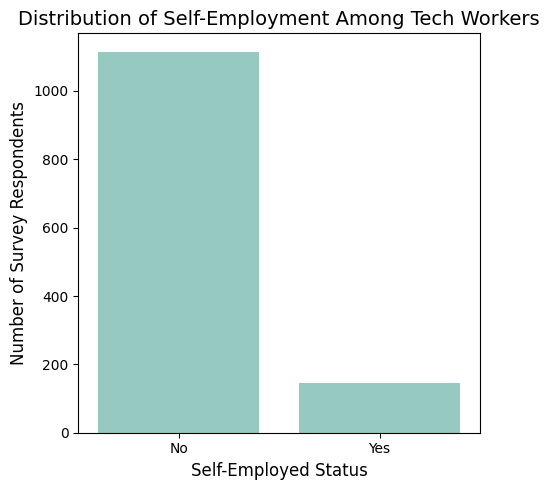

In [ ]:
# Let's visulaize it
import seaborn as sns
import matplotlib.pyplot as pl

sns.set_palette("Set3")

plt.figure(figsize=(5,5))
sns.countplot(data=df, x='self_employed')
plt.title("Distribution of Self-Employment Among Tech Workers", fontsize=14)
plt.xlabel("Self-Employed Status", fontsize=12)
plt.ylabel("Number of Survey Respondents", fontsize=12)
plt.tight_layout()



---

- The bar chart clearly shows that the majority of tech workers are not self-employed, with only around 11% reporting being self-employed.

- This suggests that most individuals in the tech industry work for companies rather than themselves.

- This may have implications for mental health support availability, as self-employed individuals may lack access to structured workplace benefits like therapy, insurance, or HR support.

- It’s important to recognize this minority group when planning for inclusive mental health resources across the industry.

---



Let's see how many pself_employed or not sought treatment

In [ ]:
pd.crosstab(df["self_employed"], df["treatment"])

treatment,No,Yes
self_employed,,
No,554,559
Yes,68,78


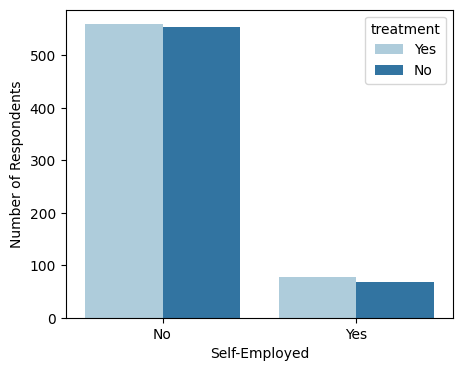

In [ ]:
# Let's visulaize it

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Paired")
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='self_employed', hue='treatment')
plt.xlabel('Self-Employed')
plt.ylabel('Number of Respondents')
plt.show()

### 🔍 Insight:
- **Only ~11% of respondents are self-employed**.
- Self-employed individuals are less likely to have access to workplace mental health support.
- These results may inform future policy decisions on how to offer structured support to freelancers in tech.




---



##** Mental Health Treatment Analysis by Family History of Mental Illness**


---



---




'family_history' – which asks if the person has a family history of mental illness. This is an important factor when analyzing mental health risk.

In [ ]:
# Check unique values and value counts
df['family_history'].value_counts(dropna=False)

,count
family_history,
No,767
Yes,492


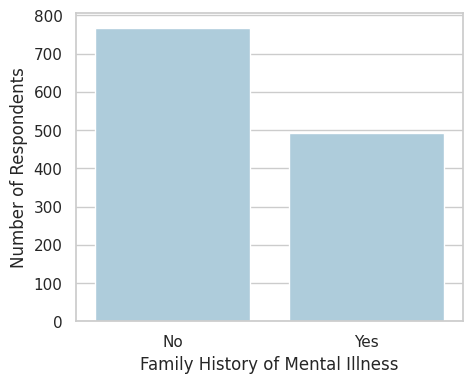

In [ ]:
# visualize family history column
import seaborn as sns
import matplotlib.pyplot as plt

# Set a theme
sns.set_theme(style='whitegrid')

# Custom color palette
sns.set_palette("Paired")
# Create a countplot
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='family_history')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Number of Respondents')
plt.show()



---
- Around 39% of the respondents working in tech have a family history of mental illness, while 61% do not.

- This is a significant finding, as family history is a known risk factor for mental health conditions.

- It suggests that nearly 4 in 10 tech workers may have a genetic or environmental predisposition to mental health challenges.

- This highlights the need for preventive mental health support in the tech industry, especially for those with such backgrounds.


---



In [ ]:
# Creating a cross-tabulation to examine the relationship between having a family history of mental illness and seeking mental health treatment

pd.crosstab(df['family_history'], df['treatment'])

treatment,No,Yes
family_history,,
No,495,272
Yes,127,365


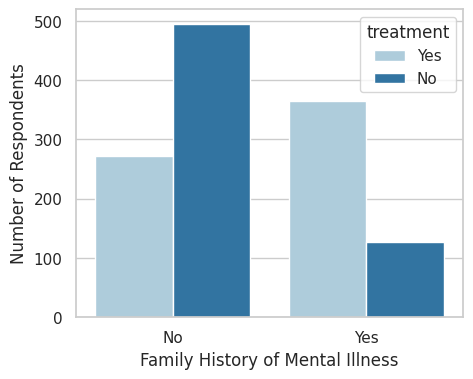

In [ ]:
# Plot Family History vs Treatment

import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("Set2")
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='family_history', hue='treatment')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Number of Respondents')
plt.show()



---


 Individuals with a family history of mental illness are much more likely to seek mental health treatment.

Among those without a family history (495 + 272 = 767), only 35.4% (272 out of 767) sought treatment.
Among those with a family history (127 + 365 = 492), a much higher 74.2% (365 out of 492) sought treatment.

**This reveals a strong association: people with a family history of mental illness are more than twice as likely to seek treatment. This could indicate increased awareness, early exposure, or proactive attitudes toward mental health care.**

---



**COLUMN: treatment**

This column tells us whether the person has ever sought treatment for a mental health condition.

In [ ]:
#  Check the unique values
df['treatment'].value_counts(dropna=False)

,count
treatment,
Yes,637
No,622


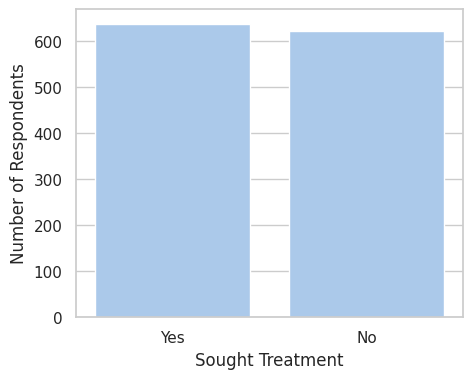

In [ ]:
# Let's visulize this data
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("pastel")
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='treatment')
plt.xlabel('Sought Treatment')
plt.ylabel('Number of Respondents')
plt.show()



---

- Approximately 50.6% of tech workers reported having sought mental health treatment, while 49.4% had not.

- This nearly even split highlights that mental health concerns are quite common in the tech industry.

- The data shows that half of the people are open to getting help, which suggests growing awareness and need for mental health support in the workplace.







---


# **Mental Health Treatment Analysis by Remote Work Status**



---


---



"Do you work remotely (outside of an office) at least 50% of the time?"

Yes → The person works remotely most of the time.

No → The person primarily works from an office or on-site.



In [ ]:
# let’s see how many people work remotely vs. don’t:
df['remote_work'].value_counts(dropna=False)

,count
remote_work,
No,883
Yes,376


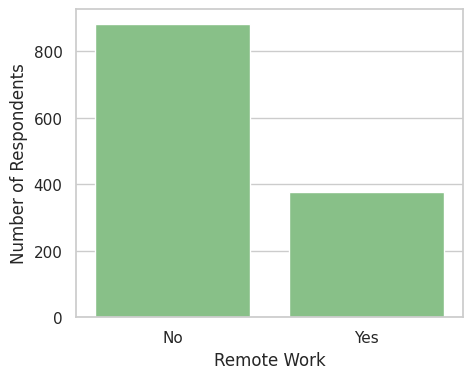

In [ ]:
# Let's visulize this data

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Accent")
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='remote_work')
plt.xlabel('Remote Work')
plt.ylabel('Number of Respondents')
plt.show()



---
- In this dataset, around 30% of respondents report working remotely (at least 50% of the time), while the majority—about 70%—work on-site.

- This indicates that most people in the tech industry still operate from a physical office, which may influence factors such as mental health, stress levels, and accessibility to support services."

---



**Let;s compare remote work status (remote_work) with whether someone has taken treatment (treatment).**

**Create a cross-tab**


In [ ]:

pd.crosstab(df['remote_work'],df['treatment'], normalize='index')*100 # Convert to actual percentage

treatment,No,Yes
remote_work,,
No,50.283126,49.716874
Yes,47.340426,52.659574


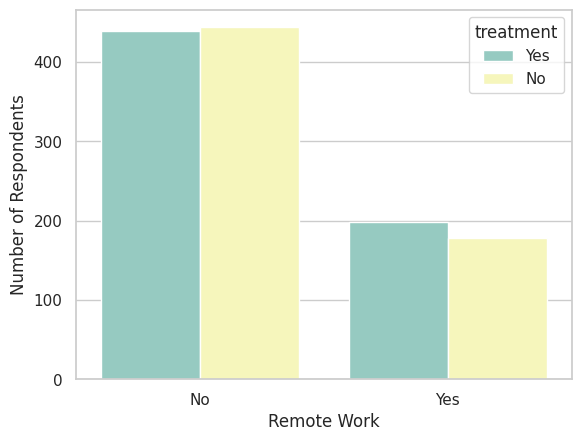

In [ ]:
# Let's plot the crosstab
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("Set3")
ct=pd.crosstab(df['remote_work'], df['treatment'])
sns.countplot(data=df, x='remote_work', hue='treatment')
plt.xlabel('Remote Work')
plt.ylabel('Number of Respondents')
plt.show()



---


Among both remote and non-remote workers, the number of respondents seeking mental health treatment and those who did not is nearly equal. However, the total number of remote workers is lower compared to non-remote workers. This suggests that remote work, in this dataset, does not show a strong relationship with whether someone seeks mental health treatment


---



**We’ll now test whether the relationship we see in the plot is real or just due to random chance.**

# Chi-Square Test of Independence


We are performing a Chi-Square Test of Independence to understand whether there's a statistical relationship between two categorical variables (like remote_work and treatment).

In [ ]:
# import the test
from scipy.stats import chi2_contingency

# create a cross tab
ct=pd.crosstab(df['remote_work'], df['treatment'])

# run the test
chi2, p_value, dof, expected=chi2_contingency(ct)
print(f"chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

chi-square statistic: 0.7996266696549379
p-value: 0.3712050125960662




---


Based on the statistical test we performed, we found no strong evidence of a link between remote work and whether someone seeks treatment. This means working from home doesn't seem to make someone more or less likely to seek help — at least in this dataset.

This means, in our dataset, working from home doesn’t appear to influence whether a person is more or less likely to seek help.

---



# **Mental Health Treatment Analysis by Company Type (Tech vs Non-Tech)**


---



---



The OSMI Mental Health in Tech Survey does collect responses from both tech and non-tech companies, even though the dataset focuses primarily on the tech industry.

So even though the dataset targets tech workers, it still includes people who work in non-tech companies — but who might be in tech-related roles (like IT) within those companies.

In [ ]:
# Checking cloumn counts

df['tech_company'].value_counts(dropna=False)

,count
tech_company,
Yes,1031
No,228


In [ ]:
# Using crosstab to see the realationship between tech company and treatmnet

pd.crosstab(df['tech_company'], df['treatment'])

treatment,No,Yes
tech_company,,
No,105,123
Yes,517,514


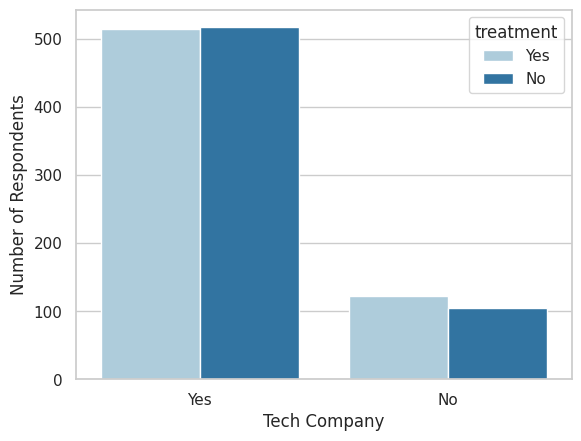

In [ ]:
# let's visulize this data

import seaborn as sns
import matplotlib.pyplot as plt

cp=pd.crosstab(df['tech_company'], df['treatment'])

sns.set_palette("Paired")
sns.countplot(x='tech_company',hue='treatment',data=df)
plt.xlabel('Tech Company')
plt.ylabel('Number of Respondents')
plt.show()



---


We notice that:

The total number of tech employees in the dataset is much higher than non-tech employees (1031 vs. 228).


Relying only on raw counts can be misleading when comparing two groups of very different sizes.


To address this, we consider the percentage of individuals who sought treatment within each group:


Non-Tech: 123 / 228 ≈ 53.9%


Tech: 514 / 1031 ≈ 49.9%


These percentages are quite close — around 50-50 in both groups. The difference is minor, and not visually significant.

Therefore, we perform a **Chi-Square Test** to statistically confirm whether this small difference is meaningful or simply due to chance.


---



In [ ]:
from scipy.stats import chi2_contingency

# create a crosstab from your data
ct=pd.crosstab(df['tech_company'], df['treatment'])

# run the test
chi2, p_value, dof, expected=chi2_contingency(ct)
print(f"chi-square statistic: {chi2}")
print(f"p-value: {p_value}")


chi-square statistic: 1.092865454273842
p-value: 0.2958371878494479




---


**Conclusion:**

Since the p-value (0.296) is greater than 0.05, we fail to reject the null hypothesis.



**Interpretation:**

There is no statistically significant relationship between working in a tech company and seeking mental health treatment.
Employees in both tech and non-tech companies appear to seek mental health treatment at similar rates.


---



# **Mental Health Treatment Analysis by benefits**

*This refers to whether the employee is provided mental health benefits by their employer.*

---



---



In [ ]:
# # Step 1: Check how many unique values there are in 'benefits'
# Also helps identify NaN or strange values

df['benefits'].value_counts(dropna=False)

,count
benefits,
Yes,477
Don't know,408
No,374


In [ ]:
# Step 2: Create a cross-tabulation between 'benefits' and 'treatment'
# This shows how mental health benefits might be related to treatment-seeking behavior

ct=pd.crosstab(df['benefits'], df['treatment'])
ct

treatment,No,Yes
benefits,,
Don't know,257,151
No,193,181
Yes,172,305


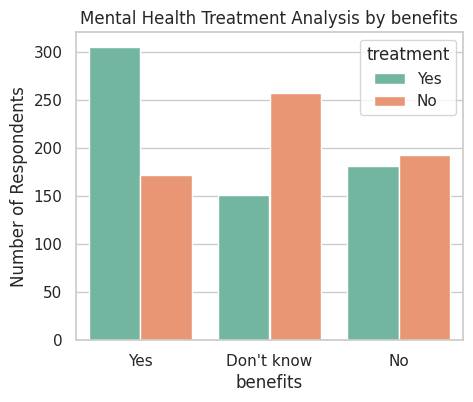

In [ ]:
# let;s plot this data

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("Set2")
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='benefits', hue='treatment')
plt.xlabel('benefits')
plt.ylabel('Number of Respondents')
plt.title('Mental Health Treatment Analysis by benefits')
plt.show()



---



 **1. "Don't know"**

Observation: 257 people did not seek treatment, while 151 did.

Interpretation:

A majority of people unaware of their company’s benefits did not seek mental health treatment.

Insight:

This may reflect the importance of awareness and communication — if people don’t know that help is available, they might avoid seeking treatment due to perceived cost or lack of support.

**2. "No" (No mental health benefits provided)**

Observation: 193 did not seek treatment, and 181 did — almost equal.

Interpretation:

Even when no formal benefits are provided, a significant number of people still seek treatment.

Insight:

This shows internal motivation, but it also suggests that lack of employer support may still be a barrier for some — with better support, more might come forward.



 **3. "Yes" (Mental health benefits provided)**

Observation: 172 did not seek treatment, but 305 did.

Interpretation:

When benefits are provided, more employees seek mental health treatment.

Insight:

This highlights a strong positive correlation — access to mental health benefits empowers employees to take care of their well-being.



**Polished Summary Statement:**

Employees who are aware of and receive mental health benefits from their employer are more likely to seek treatment, while those who don’t know or don’t have benefits are less likely to do so.
This indicates that both access and awareness of mental health support play a key role in encouraging treatment.
To improve employee well-being, companies should not only offer benefits but actively communicate them to all staff.



---



**Let's now perform a Chi-square test to statistically verify our analysis above**

**Our hypothesis is**: Access to mental health benefits increases the likelihood of seeking treatment.

The Chi-square test will help us confirm whether the observed relationship between 'benefits' and 'treatment' is statistically significant or could have occurred by chance.

In [ ]:
from scipy.stats import chi2_contingency

# Recreate the crosstab to be sure
ct = pd.crosstab(df['benefits'], df['treatment'])

# Perform chi-square test
chi2, p_value, dof, expected=chi2_contingency(ct)

print(f"chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

chi-square statistic: 64.8385903480411
p-value: 8.326816588490713e-15




---


**Interpretation:**

The p-value is extremely small (8.33 × 10⁻¹⁵) — far below the commonly used threshold of 0.05.
This means the association between mental health benefits and treatment-seeking behavior is highly statistically significant.


---



# **Mental Health Treatment Analysis by Care Options**

To analyze whether access to mental health care options at the workplace influences an employee’s decision to seek mental health treatment.

In [ ]:
# Check how many unique values there
df['care_options'].value_counts(dropna=False)

,count
care_options,
No,501
Yes,444
Not sure,314


In [ ]:
# let's see what's its relation with treatment (using crosstab)
pd.crosstab(df['care_options'], df['treatment'])

treatment,No,Yes
care_options,,
No,294,207
Not sure,191,123
Yes,137,307


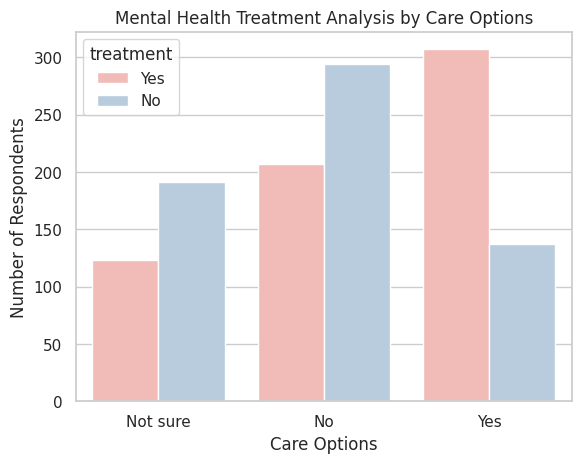

In [ ]:
# let's visualize this
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Pastel1')
sns.countplot(data=df, x='care_options', hue='treatment')
plt.xlabel('Care Options')
plt.ylabel('Number of Respondents')
plt.title('Mental Health Treatment Analysis by Care Options')
plt.show()



---

**1. No Care Options**
294 did not seek treatment

Only 207 did

*Interpretation:*

When employees report that their company does not provide mental health care options, the majority choose not to seek treatment.
This suggests that lack of access is a strong barrier.

**2. Not Sure**

191 did not seek treatment

Only 123 did

*Interpretation:*

Employees who are unsure about available care options are also less likely to seek treatment.
Uncertainty and lack of information can act as invisible barriers.

**3. Yes (Care Options Provided)**
Only 137 did not seek treatment

While 307 did

*Interpretation:*

When mental health care options are clearly provided, the number of people seeking treatment increases significantly.
This highlights the positive impact of access and awareness on mental health behavior.

---



**Now, Let’s Add the Chi-square Test**

Just to statistically verify this relationship:

In [ ]:
from scipy.stats import chi2_contingency

ct_care=pd.crosstab(df['care_options'], df['treatment'])

chi2, p_value, dof, expected=chi2_contingency(ct_care)
print(f"chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

chi-square statistic: 94.75872677329306
p-value: 2.6509645800176187e-21




---



**Interpretation of the p-value:**
Since the p-value is much smaller than 0.05, we reject the null hypothesis.



---



# **Mental Health Treatment Analysis by Anonymity Support at Workplace**
This column reflects whether the employee believes that anonymity is protected if they choose to take advantage of mental health services. The available values typically include:


In the context of mental health at the workplace, anonymity refers to whether an employee feels that:

 “If I seek mental health support or treatment through my employer or disclose a mental health condition, my identity will be kept private, and it won’t affect my professional standing.”

In [ ]:
# Check the distribution of responses in the 'anonymity' column
df['anonymity'].value_counts(dropna=False)

,count
anonymity,
Don't know,819
Yes,375
No,65




---


This indicates that a majority of respondents (over 60%) are unsure whether anonymity is ensured in their workplace when discussing mental health concerns. This lack of clarity may discourage employees from seeking help or speaking openly due to fear of exposure .


This finding highlights a clear need for:

**Improved Transparency:**
Companies should explicitly include policies about anonymity and confidentiality in their official documents—especially in the Terms and Conditions, mental health policies, and onboarding materials.

**Employer & Employee Education:**
Employers and HR personnel must be educated about the importance of anonymity and how to uphold it. Workshops, training sessions, or internal campaigns could increase awareness among employees about their rights and available safeguards.

**Mental Health Trust Building:**
Creating a culture of psychological safety starts with clarity and trust. Making anonymity policies visible and accessible can help reduce the hesitation many employees feel when seeking help.

Would you like me to help you turn this into a slide or infographic as well?








Ask ChatGPT


---



In [ ]:
# Crosstab between anonymity and treatment
anon_crosstab = pd.crosstab(df['anonymity'], df['treatment'])
print(anon_crosstab)


treatment    No  Yes
anonymity           
Don't know  448  371
No           27   38
Yes         147  228


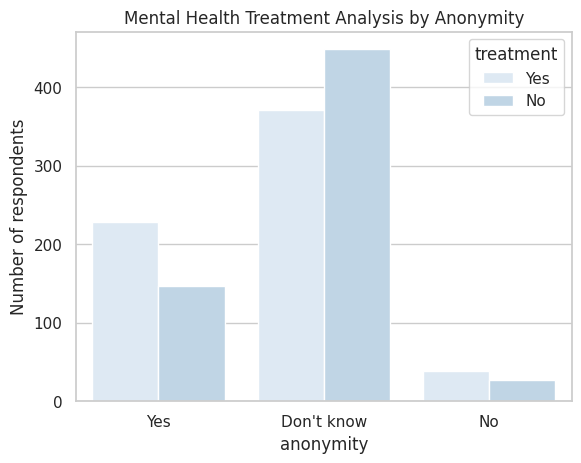

In [ ]:
# Visulize the data

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Blues')
sns.countplot(data=df, x='anonymity', hue='treatment')
plt.xlabel('anonymity')
plt.ylabel('Number of respondents')
plt.title('Mental Health Treatment Analysis by Anonymity')
plt.show()



---

The data reveals that awareness of anonymity strongly correlates with treatment-seeking behavior. Among those who knew anonymity was ensured, over 60% sought treatment, the highest rate among all groups.
In contrast, among those unsure about anonymity, more people avoided treatment than pursued it, suggesting that lack of awareness may hinder mental health support uptake.
Surprisingly, even in the “No anonymity” group, more people chose to seek treatment than not, possibly indicating urgent needs or trust in other privacy factors.


This underscores the importance of educating employees about their privacy rights, especially anonymity in mental health discussions. When employees are aware of protections, they're more likely to utilize mental health services, benefiting both individual well-being and workplace productivity.

---



# **Mental Health Treatment Analysis by wellness_program at Workplace**

Has your employer ever offered a wellness program that includes mental health support?

In [ ]:
# A quick value_counts of wellness_program

df['wellness_program'].value_counts(dropna=False)

,count
wellness_program,
No,842
Yes,229
Don't know,188




---

The data shows that a majority of respondents (842 out of ~1,259) report that their employers do not offer a wellness program that includes mental health support.

Only 229 respondents say such a program is offered, and 188 are unaware whether one exists.

---



In [ ]:
# Relationship of wellness_program with treatment
pd.crosstab(df['wellness_program'], df['treatment'])

treatment,No,Yes
wellness_program,,
Don't know,107,81
No,422,420
Yes,93,136


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

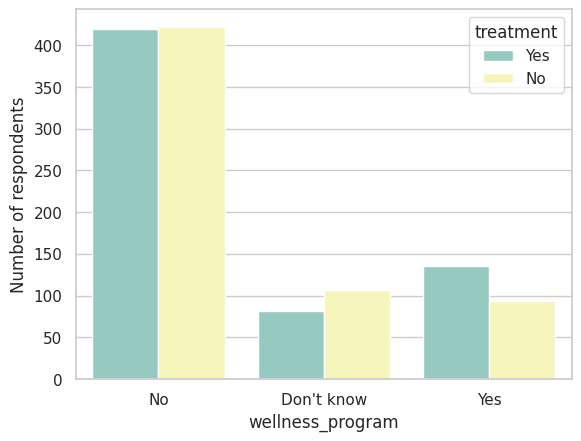

In [ ]:
# Let's visulaize this data

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Set3')
sns.countplot(data=df, x='wellness_program', hue='treatment')
plt.xlabel('wellness_program')
plt.ylabel('Number of respondents')
plt



---

As shown in the chart, employees whose companies offer wellness programs are more likely to seek mental health treatment, evidenced by the taller green bar (“Yes”) in the "Yes" category.

Interestingly, even in companies without such programs, a comparable number of employees still sought treatment — highlighting self-motivation or external support.

However, among employees unaware of any program, fewer sought treatment.
This confirms that awareness of available support plays a critical role, and programs must not only exist but be clearly communicated.

---



**Let's perform  a Chi-Square Test of Independence  to see whether our above analysis is true.**

In [ ]:
from scipy.stats import chi2_contingency

ct=pd.crosstab(df['wellness_program'], df['treatment'])

chi2, p_value, dof, expected=chi2_contingency(ct)
print(f"chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

chi-square statistic: 11.497649893136375
p-value: 0.003186522932181415




---
The Chi-Square test revealed a statistically significant association between the presence (or awareness) of a wellness program and employees’ likelihood of seeking mental health treatment (p = 0.0032).

This confirms that access to or knowledge of wellness programs has a real influence on treatment-seeking behavior
.
Employees who know such programs exist are significantly more likely to seek help, while those unaware or without such programs are less likely — supporting the need for both implementation and awareness of mental health resources in the workplace.


---



# **Mental Health Treatment Analysis based on the seek_help column**

It tells us whether employees said "Yes", "No", or "Don't know" when asked:
"Does your employer provide resources to learn more about mental health issues and how to seek help?"

In [ ]:
pd.crosstab(df['seek_help'], df['treatment'])

treatment,No,Yes
seek_help,,
Don't know,197,166
No,323,323
Yes,102,148


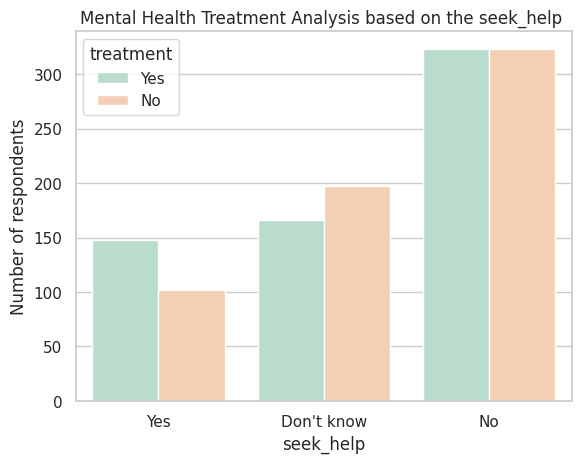

In [ ]:
# Visulaize this data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Pastel2')
sns.countplot(data=df, x='seek_help', hue='treatment')
plt.xlabel('seek_help')
plt.ylabel('Number of respondents')
plt.title('Mental Health Treatment Analysis based on the seek_help ')
plt.show()



---

 **Analysis: Impact of Company Support on Seeking Mental Health Treatment**

The cross-tabulation between the treatment and seek_help columns reveals important insights about how company-provided mental health resources influence an individual’s decision to seek treatment. Among respondents who reported that their companies do not offer mental health support, a large number (323 individuals) did not seek treatment, while an equal number (323) still chose to get treated, likely on their own. This suggests that lack of workplace support can be a barrier, but some individuals still take initiative independently.

In contrast, when support is clearly available (i.e., seek_help = Yes), more people sought treatment (148) than those who did not (102). This indicates that company-provided resources encourage individuals to seek help, showing a positive impact.

Interestingly, in the Don't know category, where employees are unsure whether support exists, 197 did not seek treatment while 166 did. This suggests that uncertainty or lack of awareness can lead to missed opportunities for support, even if help is available.

Overall, the data highlights that access to and awareness of mental health resources in the workplace significantly influences treatment-seeking behavior. Companies should not only provide such support but also ensure that employees are well-informed about it. Doing so can empower more individuals to seek the help they need.

---



# **Mental Health Treatment Analysis based on mental_health_consequence**

This column reflects whether the respondent believes that discussing a mental health issue with their employer could have negative consequences. It's important because it relates to stigma and fear of judgment—major barriers to seeking treatment.

In [ ]:
# Analyzing the relationship between 'mental_health_consequence' and 'treatment'

pd.crosstab(df['mental_health_consequence'], df['treatment'])

treatment,No,Yes
mental_health_consequence,,
Maybe,224,253
No,280,210
Yes,118,174


Text(0, 0.5, 'Number of respondents')

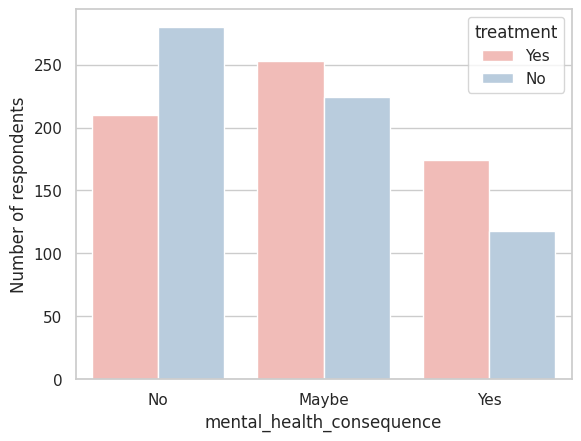

In [ ]:
# Visulaize the data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Pastel1')
sns.countplot(data=df, x='mental_health_consequence', hue='treatment')
plt.xlabel('mental_health_consequence')
plt.ylabel('Number of respondents')



---

**Analysis:**
Mental Health Consequence vs Treatment
The analysis of mental_health_consequence and treatment indicates that perceived workplace consequences do not always dictate treatment-seeking behavior. Among those who believe that discussing mental health may lead to negative consequences (Yes), more individuals have sought treatment (174) than those who haven't (118). This suggests that, despite concerns about stigma or job security, many still prioritize their mental health needs.

However, it's important to note that individuals in the "Yes" category who did not seek treatment may not necessarily be avoiding it due to stigma. They may simply not require treatment at this time, or may be managing their mental health in non-clinical ways. Thus, being cautious about workplace disclosure doesn't imply avoidance of care.

The "Maybe" group had the highest number of individuals seeking treatment (253), showing that uncertainty around workplace stigma doesn’t strongly deter help-seeking behavior, but leaves room for improvement through clearer employer communication.

Interestingly, those who believe there are no negative consequences (No) were less likely to seek treatment (only 210 compared to 280 who did not), indicating that other factors beyond stigma—such as personal denial, cost, time, or access—may be stronger deterrents in this group.

Conclusion:
While stigma is a factor, it's not the sole barrier to seeking treatment. Companies should focus on providing support, increasing mental health literacy, and removing structural barriers, so that openness translates into action when help is needed.

---



In [ ]:
# Performing Chi-square test to determine if there is a statistically significant relationship
# between mental health consequence perception and whether the person has sought treatment.
# A low p-value (below 0.05) will indicate a strong association.

from scipy.stats import chi2_contingency

ct=pd.crosstab(df['mental_health_consequence'], df['treatment'])

chi2, pvalue, dof, expected=chi2_contingency(ct)
print(f"chi-square statistic: {chi2}")
print(f"p-value: {pvalue}")

chi-square statistic: 22.327284814683573
p-value: 1.4180505235573011e-05




---
**Interpretation:**
The p-value is much smaller than 0.05, which means the result is statistically significant.

**Conclusion:**
There is a strong relationship between whether people believe they might face consequences at work for mental health issues and whether they seek treatment.

**This suggests:**

People's perception of judgment, reduced opportunities, or discrimination due to mental health may influence their decision to seek treatment.

Especially in environments where consequences are feared, people might either hesitate or actively seek help depending on how strongly they perceive the risk.

---



# **Mental Health Treatment Analysis based on phys_health_consequence**

The phys_health_consequence column represents the respondent's perception of phys_health_consequence reflects whether a person believes that disclosing a physical health issue at work could lead to negative consequences like judgment or discrimination. This perception of unsafety can indirectly contribute to stress and mental health challenges, making it relevant when analyzing who seeks mental health treatment.

In [ ]:
# Analyzing the relationship between 'phys_health_consequence' and 'treatment'

pd.crosstab(df['phys_health_consequence'], df['treatment'])


treatment,No,Yes
phys_health_consequence,,
Maybe,127,146
No,470,455
Yes,25,36


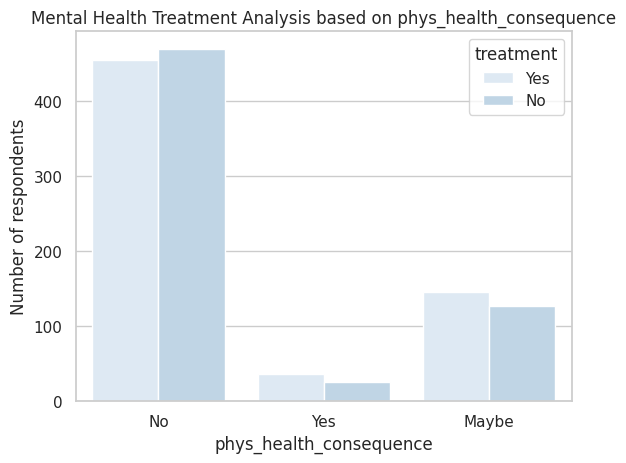

In [ ]:
# Visualize this data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Blues')
sns.countplot(data=df, x='phys_health_consequence', hue='treatment')
plt.xlabel('phys_health_consequence')
plt.ylabel('Number of respondents')
plt.title('Mental Health Treatment Analysis based on phys_health_consequence')
plt.show()



---

 **Interpretation:**

The phys_health_consequence column captures whether respondents believe that disclosing a physical health issue could lead to judgment, discrimination, or limited opportunities at work. Although the “Yes” group is the smallest (only 61 respondents), it shows the highest percentage of people who sought treatment (59%). This suggests that individuals fearing physical health stigma may already be experiencing higher stress or are more aware of their mental health needs.

The “Maybe” group also saw a majority seeking treatment (53.5%), showing that uncertainty about workplace discrimination doesn’t prevent help-seeking.

On the other hand, the “No” group—those who do not fear consequences—had the lowest treatment rate (49.2%), despite being the largest group. This could mean that other factors like awareness, access, or personal beliefs may play a larger role in their decision-making.



---



**Performing a Chi-square** test to statistically examine whether there is a significant relationship
between individuals' belief in facing physical health consequences at work and their likelihood
of seeking mental health treatment. This helps determine if concerns about physical health
consequences (like discrimination or reduced opportunities) are associated with the decision to seek treatment.

In [ ]:
from scipy.stats import chi2_contingency

ct=pd.crosstab(df['phys_health_consequence'], df['treatment'])

chi2, pvalue, dof, expected=chi2_contingency(ct)
print(f"chi-square statistic: {chi2}")
print(f"p-value: {pvalue}")

chi-square statistic: 3.37095936136966
p-value: 0.18535549917522617




---
**Interpretation:**

Since the p-value (0.185) is greater than 0.05, we fail to reject the null hypothesis. This means:

There is no statistically significant relationship between individuals' belief in facing physical health consequences and their likelihood of seeking mental health treatment.

**In Simple Terms:**

Even if some people believe that sharing their physical health condition might lead to discrimination or reduced opportunities, this belief doesn't strongly influence whether they actually seek mental health treatment — at least not in a statistically provable way from this data.








---



---



## Final Interpretation & Recommendations

This analysis explored the top 10 factors associated with seeking mental health treatment among tech workers. Using cross-tabulation and chi-square testing, we identified several key drivers behind treatment-seeking behavior.

### Key Insights:

- **Family History**: Individuals with a family history of mental illness are more likely to seek treatment, likely due to increased awareness or personal concern.

- **Mental Health Consequences**: Those who believe that mental health issues may negatively impact their career are more likely to seek help, possibly out of urgency or fear.

- **Benefits and Care Options**: Employees with access to mental health benefits or care options, or those who are simply informed about them, are significantly more inclined to pursue treatment.

- **Seeking Help Culture**: If a company actively encourages seeking help, employees tend to follow through — showing how corporate culture shapes behavior.

- **Work Interference**: Greater interference of mental health with work correlates with increased likelihood of seeking treatment.

- **Leave Policies**: Supportive leave for mental health is associated with higher treatment-seeking behavior.

- **Mental vs Physical Health Importance**: Those who view mental and physical health as equally important are more proactive in seeking treatment.

- **Wellness Programs**: No strong statistical link found — effectiveness may depend on awareness, quality, and customization.

- **Anonymity**: No significant relationship — indicating that anonymous access alone doesn’t strongly influence treatment behavior.

---

### Recommendations for Tech Companies:

1. **Clearly Communicate Benefits**: Ensure employees understand their mental health coverage and care options.

2. **Encourage Seeking Help**: Foster a culture that normalizes help-seeking and reduces stigma.

3. **Train Leadership**: Managers and HR should be trained to handle mental health discussions sensitively.

4. **Make Wellness Programs Effective**: Instead of generic offerings, tailor programs to employee feedback.

5. **Support Employees with Risk Factors**: Offer proactive support to those with known mental health vulnerabilities.

6. **Build a Psychologically Safe Environment**: Make employees feel safe in disclosing or seeking help without fear of professional consequences.

---

### Conclusion:

The decision to seek mental health treatment is influenced by a combination of personal history, workplace culture, access to care, and perceived consequences. Companies that proactively support mental health — not just through benefits, but through communication, culture, and leadership — can make a measurable difference in employee well-being and performance.
